## [Reference](https://www.kaggle.com/maskrap97/easy-to-follow-eda-and-machine-learning-python) 
* using data from  [ House Prices - Advanced Regression Techniques ](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
* [추가 참고](https://eda-ai-lab.tistory.com/8)

## 라이브러리 및 데이터 로드

In [101]:
import warnings

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, PowerTransformer, LabelEncoder
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

plt.rc('font', family = 'Malgun Gothic')
plt.style.use('seaborn') 
sns.set(font_scale=1)  
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_og = train.copy()
test_og = test.copy()

display(train.head(), train.shape, test.head(), test.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


(1459, 80)

* **train과 test의 데이터 수가 거의 비슷. 80개의 독립변수와 1개의 종속변수로 구성**

## Data Profiling - 소개

In [ ]:
data_profile = train.profile_report()
data_profile.to_file('data_profile_report.html')

## Null Data 탐색
* **null의 비중이 지나치게 높다면 -> 버림**
* **null이 조금만 있다면 -> 평균 또는 중앙값으로 채움**

In [3]:
# train, test 한꺼번에 처리하기 위해 합침 

data = pd.concat([train, test], keys = ('x', 'y'))
data = data.drop('Id', axis = 1)

data

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
x 0             60       RL         65.0     8450   Pave   NaN      Reg   
  1             20       RL         80.0     9600   Pave   NaN      Reg   
  2             60       RL         68.0    11250   Pave   NaN      IR1   
  3             70       RL         60.0     9550   Pave   NaN      IR1   
  4             60       RL         84.0    14260   Pave   NaN      IR1   
...            ...      ...          ...      ...    ...   ...      ...   
y 1454         160       RM         21.0     1936   Pave   NaN      Reg   
  1455         160       RM         21.0     1894   Pave   NaN      Reg   
  1456          20       RL        160.0    20000   Pave   NaN      Reg   
  1457          85       RL         62.0    10441   Pave   NaN      Reg   
  1458          60       RL         74.0     9627   Pave   NaN      Reg   

       LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
x 0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
  1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
  2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
  3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
  4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...            ...       ...       ...       ...          ...        ...   
y 1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
  1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
  1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
  1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
  1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

       Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
x 0          Norm     1Fam     2Story            7            5       2003   
  1          Norm     1Fam     1Story            6            8       1976   
  2          Norm     1Fam     2Story            7            5       2001   
  3          Norm     1Fam     2Story            7            5       1915   
  4          Norm     1Fam     2Story            8            5       2000   
...           ...      ...        ...          ...          ...        ...   
y 1454       Norm    Twnhs     2Story            4            7       1970   
  1455       Norm   TwnhsE     2Story            4            5       1970   
  1456       Norm     1Fam     1Story            5            7       1960   
  1457       Norm     1Fam     SFoyer            5            5       1992   
  1458       Norm     1Fam     2Story            7            5       1993   

        YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
x 0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
  1             1976     Gable  CompShg     MetalSd     MetalSd       None   
  2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
  3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
  4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...              ...       ...      ...         ...         ...        ...   
y 1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
  1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
  1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
  1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
  1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

        MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
x 0          196.0        Gd        TA      PConc       Gd       TA   
  1            0.0        TA        TA     CBlock       Gd       TA   
  2          162.0        Gd        TA      PConc       Gd       TA   
  3            0.0        TA        

### 변수별 null data 비중

In [4]:
# 각 feature별 null data 비중을 구함. SalePrice는 무시할 것.

null_data = data.isnull().sum().sort_values(ascending = False)
null_percentage = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([null_data, null_percentage], axis = 1, keys = ['Total', 'Percentage'])

missing_data.loc[missing_data['Total'] > 0]

,Total,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageQual,159,0.054471


### Null data 분석(SalePrice제외하고) - 소개
* **결측치 비율이 높은 것**
    * PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage
    
    
* **결측치 비율과 컬럼의 성격이 비슷한 것**
    * Garage 관련, Bsmt 관련, MasVnr 관련
    
    
* **결측치 비율이 굉장히 낮지만, 완전히 똑같은 것들**
    * Utilities, Functional, BsmtFullBath, BsmtHalfBath
    * 비율이 0.000343인 것들 전부
    
    
* **단순 결측으로 보이는 것: MSZoning**
    
    
* **결측치의 종류**    

    * MCAR(Missing completely at Random) : 완전 무작위 결측
        * 컬럼 x1, x2, x3가 있을 때, x2열에 결측치가 있다고 해보자.
        * x2열의 결측치가 x1, x3와 아무 관계(상관,인과)가 없을 경우를 MCAR이라 한다.
        * 예: 전산상의 오류, 단순 누락 등 결측값 발생에 의도가 없는 것으로 추정되는 경우        
        
    * MAR(Missing at Random) : 무작위 결측
        * 누락된 부분이 특정 변수와 관련되어 일어나지만, 그 관계는 측정할 수 없는 경우
        * 예: 여성의 경우 몸무게를 기입하지 않을 가능성이 높다
        
    * MNAR(Missing at not Random) : 비무작위 결측
        * 위 두 가지에 해당하지 않는 경우
        * 결측값이 의도적으로 발생한 상태이므로 무시하면 안 된다.
        * x2열에 결측치가 있다면 그 결측치는 x2열의 성격 자체에 영향을 받은 것이다.

#### MSZoning
* **MSZoning은 Neighborhood변수와 관계가 있을 것으로 추측**
* **각 결측치가 가지는 Neighborhood를 파악한 뒤 해당 Neighborhood의 MSZoning 중 최빈값으로 대체함**

In [5]:
data[data['MSZoning'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
y 455           30      NaN        109.0    21780   Grvl   NaN      Reg   
  756           20      NaN         80.0    14584   Pave   NaN      Reg   
  790           70      NaN          NaN    56600   Pave   NaN      IR1   
  1444          20      NaN        125.0    31250   Pave   NaN      Reg   

       LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
y 455          Lvl       NaN    Inside       Gtl       IDOTRR       Norm   
  756          Low    AllPub    Inside       Mod       IDOTRR       Norm   
  790          Low    AllPub    Inside       Gtl       IDOTRR       Norm   
  1444         Lvl    AllPub    Inside       Gtl      Mitchel     Artery   

       Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
y 455        Norm     1Fam     1Story            2            4       1910   
  756        Norm     1Fam     1Story            1            5       1952   
  790        Norm     1Fam     2.5Unf            5            1       1900   
  1444       Norm     1Fam     1Story            1            3       1951   

        YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
y 455           1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
  756           1952     Gable  CompShg     AsbShng     VinylSd       None   
  790           1950       Hip  CompShg     Wd Sdng     Wd Sdng       None   
  1444          1951     Gable  CompShg      CBlock     VinylSd       None   

        MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
y 455          0.0        Fa        Fa     CBlock      NaN      NaN   
  756          0.0        Fa        Po       Slab      NaN      NaN   
  790          0.0        TA        TA     BrkTil       TA       TA   
  1444         0.0        TA        Fa     CBlock      NaN      NaN   

       BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
y 455           NaN          NaN         0.0          NaN         0.0   
  756           NaN          NaN         0.0          NaN         0.0   
  790            No          Unf         0.0          Unf         0.0   
  1444          NaN          NaN         0.0          NaN         0.0   

        BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
y 455         0.0          0.0    GasA        TA          N      FuseA   
  756         0.0          0.0    Wall        Po          N      FuseA   
  790       686.0        686.0    GasA        Ex          Y      SBrkr   
  1444        0.0          0.0    GasA        TA          Y      FuseA   

        1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
y 455        810         0             0        810           0.0   
  756        733         0             0        733           0.0   
  790       1150       686             0       1836           0.0   
  1444      1600         0             0       1600           0.0   

        BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
y 455            0.0         1         0             1             1   
  756            0.0         1         0             2             1   
  790            0.0         2         0             4             1   
  1444           0.0         1         1             3             1   

       KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
y 455           TA             4       Min1           0         NaN   
  756           Fa             4        NaN           0         NaN   
  790           TA             7       Maj1           0         NaN   
  1444          TA             6        Mod           0         NaN   

       GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
y 455      Detchd       1975.0          Unf         1.0       280.0   
  756      Attchd       1952.0          Unf         2.0       487.0   
  790      Detchd       1900.0          Unf         1.0       288.0   
  1444     Attchd       1951.

In [6]:
data[data['Neighborhood'] == 'IDOTRR']['MSZoning'].value_counts()

RM         68
C (all)    22
Name: MSZoning, dtype: int64

In [7]:
data[data['Neighborhood'] == 'Mitchel']['MSZoning'].value_counts()

RL    104
RM      9
Name: MSZoning, dtype: int64

In [8]:
data.loc[(data['MSZoning'].isnull()) & (data['Neighborhood'] == 'IDOTRR'), 'MSZoning'] = 'RM'
data.loc[(data['MSZoning'].isnull()) & (data['Neighborhood'] == 'Mitchel'), 'MSZoning'] = 'RL'

data[data['MSZoning'].isnull()]

,,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### PoolQC

* **아래와 같이 PoolQC의 unique값을 보면, 총 4개로 이루어져 있다.**
* **데이터셋에 함께 제공된 data_description.txt을 통해 보면, nan은 수영장이 없는 경우임을 알 수 있다.**
* **즉, 이 결측치는 'NA'정도로 채우면 된다.(현재는 nan으로 컴퓨터가 null로 인식하므로, value counting이 가능하도록 문자열 형태이지만 null로 알아볼 수 있도록 한다는 의미)**

In [9]:
data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [10]:
data[['PoolQC', 'PoolArea']].head(3)

PoolQC  PoolArea
x 0    NaN         0
  1    NaN         0
  2    NaN         0

#### MiscFeature
* **본 컬럼은 가령 '기타 특징'으로 설명할 수 있다.**
* **엘레베이터가 있다던지, 차고가 하나 더 있다던지, 테니스코트가 있다던지 등등..**
* **따라서 여기서의 nan은 기타 특징이 없다는 의미이므로 위의 PoolQC와 마찬가지로 처리하면 된다.**

In [11]:
data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

#### Alley
* **data description을 통해 확인하면, 이 컬럼의 nan 역시 Alley가 없어서 기입이 안 됨을 알 수 있다.**
* **'NA'로 대체**

In [12]:
data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

#### Fence 
* **이 컬럼은 fence의 품질을 나타낸다. data description을 보면 nan은 fence가 없다는 의미이다.**
* **'NA'로 대체**

In [13]:
data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

#### FireplaceQu
* **이 컬럼은 집 내부의 모닥불 피는 공간의 품질을 나타낸다. data description을 보면 nan은 Fireplace가 없다는 의미이다.**
* **'NA'로 대체**

In [14]:
data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [15]:
data[['Fireplaces', 'FireplaceQu']].head()

Fireplaces FireplaceQu
x 0           0         NaN
  1           1          TA
  2           1          TA
  3           1          Gd
  4           1          TA

#### LotFrontage
* **Lot는 미국 부동산 용어에서 집, 마당, 더 넓게는 집앞의 도로 까지 전부 포함한 넓이이다.**
* **LotFrontage는 주택과 도로가 겹치는 부분을 선으로 나타내어 feet단위로 측정한 것이다.**
* **즉, 집이 있다면 반드시 LotFrontage가 있어야 한다.**


* **추측**
    * **Lot은 MSZoning(미국 부동산 구분)에 따라 크기가 차이를 가질 것으로 추측하였다**
    * **또한 무작위로 행을 선별하여 LotArea에 LotFrontage를 나누면 120~180 사이의 숫자가 나온다는 것을 파악하였다.**
    * **따라서 위 두 가지를 갖고 LotFrontage가 nan인 것들의 MSZoning에 맞는 계수를 나누어 적절한 LotFrontage의 값을 산출하여 대체한다.**

In [16]:
data[['LotFrontage', 'LotArea', 'MSZoning']]

LotFrontage  LotArea MSZoning
x 0            65.0     8450       RL
  1            80.0     9600       RL
  2            68.0    11250       RL
  3            60.0     9550       RL
  4            84.0    14260       RL
...             ...      ...      ...
y 1454         21.0     1936       RM
  1455         21.0     1894       RM
  1456        160.0    20000       RL
  1457         62.0    10441       RL
  1458         74.0     9627       RL

[2919 rows x 3 columns]

In [17]:
display(data['LotArea'].skew(), data['LotFrontage'].skew())

12.829024853018762

1.5032778146412304

In [18]:
data_lot = data.groupby('MSZoning')['LotArea','LotFrontage'].median()

data_lot['coef_lot'] = data_lot['LotArea'] / data_lot['LotFrontage']

data_lot

,LotArea,LotFrontage,coef_lot
MSZoning,,,
C (all),8500,60.0,141.666667
FV,7379,65.0,113.523077
RH,7168,60.0,119.466667
RL,10000,72.0,138.888889
RM,6120,52.0,117.692308


In [19]:
lot_dict = {'C (all)' : 141, 'FV' : 113, 'RH' : 119, 'RL' : 138, 'RM' : 117}

lot_dict

{'C (all)': 141, 'FV': 113, 'RH': 119, 'RL': 138, 'RM': 117}

In [20]:
lot_key = list(lot_dict.keys())
lot_value = list(lot_dict.values())

for i, j in zip(lot_key, lot_value):
    data.loc[(data['LotFrontage'].isnull()) & (data['MSZoning'] == i), 'LotFrontage'] = round(data['LotArea'] / j, 0)

In [21]:
data[data['LotFrontage'].isnull()]

,,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### Garage 관련 변수 구분

* **명목형 변수: 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType'**
    * Garage가 없다면 nan을 갖는 것으로 확인함. 'NA'로 대체
    

* **수치형 변수: 'GarageYrBlt'**
    * 적절한 추론을 하기 힘들기 때문에 최빈값인 2005년으로 대체함

In [22]:
display(data['GarageCond'].unique(),
        data['GarageQual'].unique(),
        data['GarageFinish'].unique(),
        data['GarageType'].unique()
       )

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [23]:
data['GarageYrBlt'].mode()
data.loc[data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = data['GarageYrBlt'].mode()[0]

data['GarageYrBlt'].isnull().sum()

0

#### Basement 관련

* **'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1' 전부 명목형 변수임**
    * 지하실이 없다면 nan을 갖는 것을 확인함. 'NA'로 대체

In [24]:
display(data['BsmtCond'].unique(),
        data['BsmtExposure'].unique(),
        data['BsmtQual'].unique(),
        data['BsmtFinType2'].unique(),
        data['BsmtFinType1'].unique()
       )

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

#### MasVnrType, MasVnrArea
* **Type이 None일 경우 Area에도 0일 가능성이 높다**
* **아주 약간의 차이는 있지만, Type은 None으로, Area는 0으로 해도 무방할 것으로 판단된다**

In [25]:
data['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [26]:
data['MasVnrArea'].value_counts()

0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64

In [27]:
data.loc[data['MasVnrType'].isnull(), 'MasVnrType'] = 'None'
data.loc[data['MasVnrArea'].isnull(), 'MasVnrArea'] = 0

#### 결측치 비율이 완전히 똑같은 것들

* **결측치가 동일하게 2개인 컬럼**
    * Utilities, Functional, BsmtFullBath, BsmtHalfBath	
    * Bsmt관련 컬럼은 동일하게 둘 다 Null이나, 나머지 두 개는 개별로 취급해야 함을 확인함
    
    
* **결측치가 동일하게 1개인 컬럼**
    * GarageCars, BsmtFinSF2, Exterior2nd, GarageArea, TotalBsmtSF, BsmtUnfSF, BsmtFinSF1, Exterior1st, KitchenQual, SaleType, Electrical

In [28]:
# Utilities가 null이더라도 나머지는 값이 있다.

data[data['Utilities'].isnull()][['Utilities', 'Functional', 'BsmtFullBath', 'BsmtHalfBath']]

Utilities Functional  BsmtFullBath  BsmtHalfBath
y 455       NaN       Min1           0.0           0.0
  485       NaN       Min2           0.0           0.0

In [29]:
# BsmtFullBath가 null이면, HalfBath도 null이지만, 나머지는 값이 있다.

data[data['BsmtFullBath'].isnull()][['Utilities', 'Functional', 'BsmtFullBath', 'BsmtHalfBath']]

Utilities Functional  BsmtFullBath  BsmtHalfBath
y 660    AllPub        Typ           NaN           NaN
  728    AllPub        Typ           NaN           NaN

In [30]:
# Functional이 null이더라도 나머지는 값이 있다.

data[data['Functional'].isnull()][['Utilities', 'Functional', 'BsmtFullBath', 'BsmtHalfBath']]

Utilities Functional  BsmtFullBath  BsmtHalfBath
y 756     AllPub        NaN           0.0           0.0
  1013    AllPub        NaN           0.0           0.0

* **Utilities**
    * 1개를 제외하고 전부 AllPub이므로, null도 AllPub으로 대체
    * 본 컬럼 자체가 유의미하지 않을 것으로 판단된다.

In [31]:
data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [32]:
data.loc[data['Utilities'].isnull(), 'Utilities'] = 'AllPub'
data['Utilities'].isnull().sum()

0

* **Functional**
    * 거의 다 Typ이므로, null도 Typ으로 대체
    * 본 컬럼 자체가 유의미하지 않을 것으로 판단된다.

In [33]:
data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [34]:
data.loc[data['Functional'].isnull(), 'Functional'] = 'Typ'
data['Functional'].isnull().sum()

0

* **BsmtFullBath, BsmtHalfBath**
    * 0~3의 갯수가 입력된 것으로 보아, 지하실의 화장실 유무라고 판단된다. 따라서 해당 결측치를 가진 행을 보고 지하실이 있는지부터 확인해야 한다.
    * null인 행의 'BsmtQual'이 NaN이라는 것은 지하실이 없음을 의미한다.
    * 즉, 본 컬럼의 결측값으로는 0이 합당하다.

In [35]:
data['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [36]:
data[data['BsmtFullBath'].isnull()][['BsmtFullBath', 'BsmtHalfBath', 'BsmtQual']]

BsmtFullBath  BsmtHalfBath BsmtQual
y 660           NaN           NaN      NaN
  728           NaN           NaN      NaN

In [37]:
data.loc[data['BsmtFullBath'].isnull(), 'BsmtFullBath'] = 0
data.loc[data['BsmtHalfBath'].isnull(), 'BsmtHalfBath'] = 0

* **GarageCars, GarageArea**
    * 아래를 통해 GarageCars(차고에 들어갈 수 있는 차의 대수)와 GarageArea(차고 넓이)가 동시에 null이 있음을 알 수 있다.
    * Garage가 없으면 본 컬럼들에는 0이 들어가는 것이 합당하다.

In [38]:
data[data['GarageCars'].isnull()][['GarageCars', 'BsmtFinSF2', 'Exterior2nd',
                                   'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 
                                   'BsmtFinSF1', 'Exterior1st', 'KitchenQual', 
                                   'SaleType', 'Electrical']]

,,GarageCars,BsmtFinSF2,Exterior2nd,GarageArea,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1,Exterior1st,KitchenQual,SaleType,Electrical
y,1116,NaN,0.0,Plywood,NaN,859.0,311.0,548.0,Wd Sdng,Gd,WD,SBrkr


In [39]:
data['GarageCars'].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [40]:
data[data['GarageCars'].isnull()][['GarageCars', 'GarageArea', 'GarageQual']]

,,GarageCars,GarageArea,GarageQual
y,1116,NaN,NaN,NaN


In [41]:
data.loc[data['GarageCars'].isnull(), 'GarageCars'] = 0
data.loc[data['GarageArea'].isnull(), 'GarageArea'] = 0

* **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF**
    * 지하실과 관련된 컬럼들에 공통적으로 null이 있고 해당 컬럼은 연속형 변수이다.
    * BsmtQual을 이용하여 확인 결과 지하실이 없으므로 0으로 대체한다

In [42]:
data[data['BsmtFinSF2'].isnull()][['BsmtFinSF2', 'Exterior2nd',
                                   'TotalBsmtSF', 'BsmtUnfSF', 
                                   'BsmtFinSF1', 'Exterior1st', 'KitchenQual', 
                                   'SaleType', 'Electrical']]

,,BsmtFinSF2,Exterior2nd,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1,Exterior1st,KitchenQual,SaleType,Electrical
y,660,NaN,CBlock,NaN,NaN,NaN,MetalSd,TA,ConLD,FuseA


In [43]:
data[data['BsmtFinSF2'].isnull()][['BsmtFinSF2', 'BsmtQual']]

,,BsmtFinSF2,BsmtQual
y,660,NaN,NaN


In [44]:
data.loc[data['BsmtFinSF2'].isnull(), 'BsmtFinSF2'] = 0
data.loc[data['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = 0
data.loc[data['BsmtUnfSF'].isnull(), 'BsmtUnfSF'] = 0
data.loc[data['BsmtFinSF1'].isnull(), 'BsmtFinSF1'] = 0

* **Exterior2nd, Exterior1st**
    * 최빈값으로 채우는 것이 좋을 것 같다.

In [45]:
data[data['Exterior2nd'].isnull()][['Exterior2nd', 'Exterior1st', 'KitchenQual', 
                                   'SaleType', 'Electrical']]

,,Exterior2nd,Exterior1st,KitchenQual,SaleType,Electrical
y,691,NaN,NaN,Fa,WD,SBrkr


In [46]:
data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [47]:
data.loc[data['Exterior2nd'].isnull(), 'Exterior2nd'] = 'VinylSd'
data.loc[data['Exterior1st'].isnull(), 'Exterior1st'] = 'VinylSd'

* **나머지**
    * 서로 연관이 없을 뿐더러, 추론할 수 있는 컬럼이 없다고 판단되므로 최빈값으로 채운다

In [48]:
data[data['KitchenQual'].isnull()][['KitchenQual', 
                                   'SaleType', 'Electrical']]

,,KitchenQual,SaleType,Electrical
y,95,NaN,COD,SBrkr


In [49]:
data[data['SaleType'].isnull()][['SaleType', 'Electrical']]

,,SaleType,Electrical
y,1029,NaN,SBrkr


In [50]:
data.loc[data['KitchenQual'].isnull(), 'KitchenQual'] = data['KitchenQual'].mode()[0]
data.loc[data['SaleType'].isnull(), 'SaleType'] = data['SaleType'].mode()[0]
data.loc[data['Electrical'].isnull(), 'Electrical'] = data['Electrical'].mode()[0]

#### 'NA'로 처리할 null data
* **'NA'로 처리할 것들: 'PoolQC', 'MiscFeature', 'Alley', 'Fence',  'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1'**

In [51]:
na_list = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 
           'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 
           'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']

for col in na_list:
    data[col].fillna('NA', inplace = True)

#### null 처리 완료 결과 

In [52]:
null_data_2 = data.isnull().sum().sort_values(ascending = False)
null_percentage_2 = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)

missing_data_2 = pd.concat([null_data_2, null_percentage_2], axis = 1, keys = ['Total', 'Percentage'])

missing_data_2.loc[missing_data_2['Total'] > 0]

,Total,Percentage
SalePrice,1459,0.499829


In [53]:
data.shape

(2919, 80)

## 종속변수의 정규성 확인 - 소개

* **skewness 0, kurtosis 0이면 완전한 정규분포로 봄**
    * 특이사항: pandas의 kurtosis함수는 Fisher의 정의를 따르므로 정규분포의 kurtosis를 0으로 가정함([doc](https://pandas.pydata.org/docs/reference/api/pandas.Series.kurt.html))
    * 만약 Pearson의 정의(첨도 = 3 이 정규분포)를 기준으로 하려면 아래와 같이 수행
```python
from scipy.stats import kurtosis
kurtosis(data, fisher = False)
```

In [54]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* **평균 > 중앙값 이므로 왜도가 (+)인 Right-skewed일 것으로 예상**

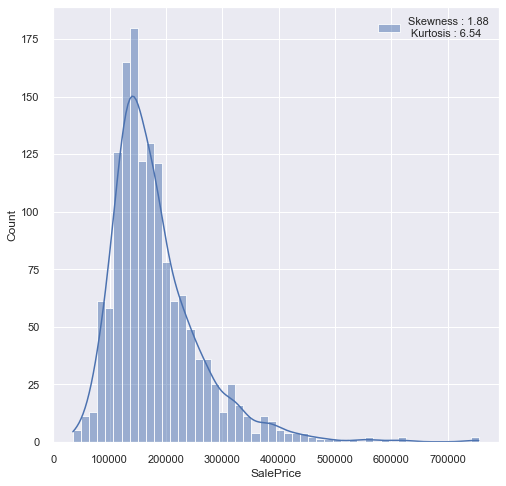

In [55]:
plt.figure(figsize = (8, 8))

sns.histplot(data = train, x = 'SalePrice', bins = 50, kde = True, 
            label='Skewness : {:.2f}\n Kurtosis : {:.2f}'.format(train['SalePrice'].skew(), train['SalePrice'].kurt())).legend()
plt.show()

* **왜도가 1 이상이며 첨도도 높기 때문에 outlier가 있다는 점을 알 수 있다.**

### 종속변수에 로그 취하기

* **종속변수(타겟)의 편차가 큰 경우 스케일링을 해주는 것이 좋다.**
* **Ridge, Lasso 및 ElesticNet과 같은 정규화모델의 경우는 정규분포일 때 더 잘 작동한다.**
* **SalePrice가 0인 것은 없기 때문에 그냥 np.log만 해도 무방하나, 습관을 들이기 위해 그냥 커널과 동일하게 np.log1p로 수행함**

[참고 블로그](https://steadiness-193.tistory.com/224)

* **np.log1p로 수행한 것은 추후 지수변환하여 되돌릴 때 np.expm1로 하면 됨**
    * np.log1p: 여기서 p는 plus. 0에 로그변환 시 에러나는 것을 방지하기 위해 값에 1을 더한 뒤 로그변환한 것 
    * np.expm1: 여기서 m은 minus. 1을 더하고 로그를 취했으므로, 지수변환 후 1을 다시 빼주는 것 

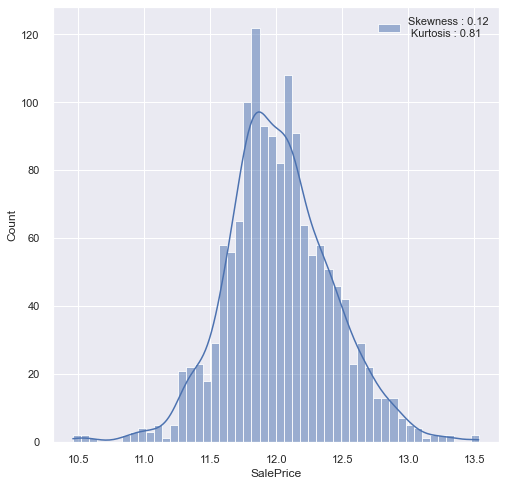

In [56]:
train['SalePrice'] = np.log1p(train['SalePrice'])
data['SalePrice'] = np.log1p(data['SalePrice'])

plt.figure(figsize = (8, 8))
sns.histplot(data = train, x = 'SalePrice', bins = 50, kde = True, 
            label='Skewness : {:.2f}\n Kurtosis : {:.2f}'.format(train['SalePrice'].skew(), train['SalePrice'].kurt())).legend()
plt.show()

## 상관관계 분석

### 상관관계 높은 순으로 확인

In [57]:
corr = train.corr()
corr_rank = corr['SalePrice'].sort_values(ascending = False)

corr_rank.to_frame()

,SalePrice
SalePrice,1.000000
OverallQual,0.817185
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
1stFlrSF,0.596981
FullBath,0.594771
YearBuilt,0.586570
YearRemodAdd,0.565608


### 상관관계 높은 feature 선별하여 히트맵
* 개선사항: 기존 커널 대비 깔끔하게 표현

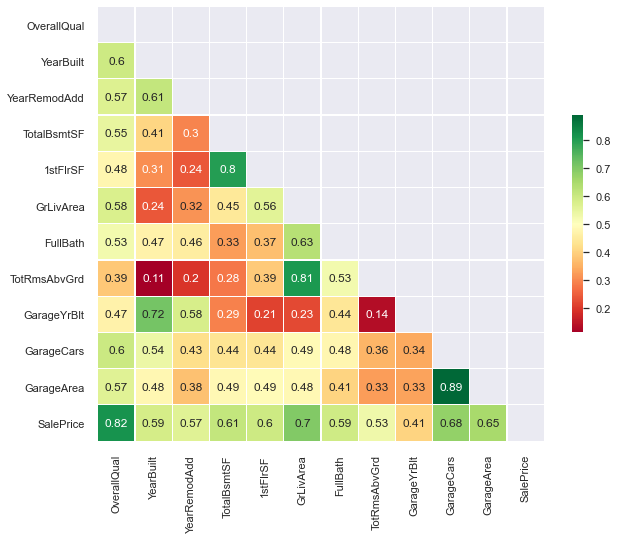

In [58]:
top_features = corr[abs(corr['SalePrice']) >= 0.5].index
top_corr = data[top_features].corr()

plt.figure(figsize = (10, 8))

mask = np.zeros_like(top_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

heat_map = sns.heatmap(top_corr,
                       annot = True, 
                       cmap = 'RdYlGn',
                       mask = mask,
                      linewidths = 0.1,
                      cbar_kws={'shrink' : .5}
                      )

* **SalePrice와의 상관관계**
    * 0.7 이상: OverallQual, GrLivArea
    * 뒤이어 GarageArea, GarageCars, TotalBsmtSF, 1stFlrSF 도 높음
    * living area와 관련된 feature들이 SalePrice에 큰 영향을 미침을 알 수 있음

### 상관관계 상위 12개만 선별, scatter plot 그리기

In [59]:
# corr_rank에서 SalePrice를 drop(아래 셀의 for문을 이용해 상관관계를 나타낼 때 SalePrice는 불필요하므로)
# 이후 남은 index들을 리스트로 담음

corr_rank.drop(['SalePrice'], inplace = True)
sorted_corr = list(corr_rank.index)

* **zip을 통해 여러 plot을 for문으로 나타내기(동일한 y 사용 조건)**

```python
fig, axes = plt.subplots(4, 3, figsize=(20,15), sharey= True)

for i, j in zip(range(subplot의 갯수, iterable 객체):
    sns.플롯명(y = df['타겟변수명'], x = df[j], ax = axes[i // 열 갯수][i % 열 갯수]
    axes[i // 열 갯수][i % 열 갯수].set_title('반복하고자 하는 str' + j)
```

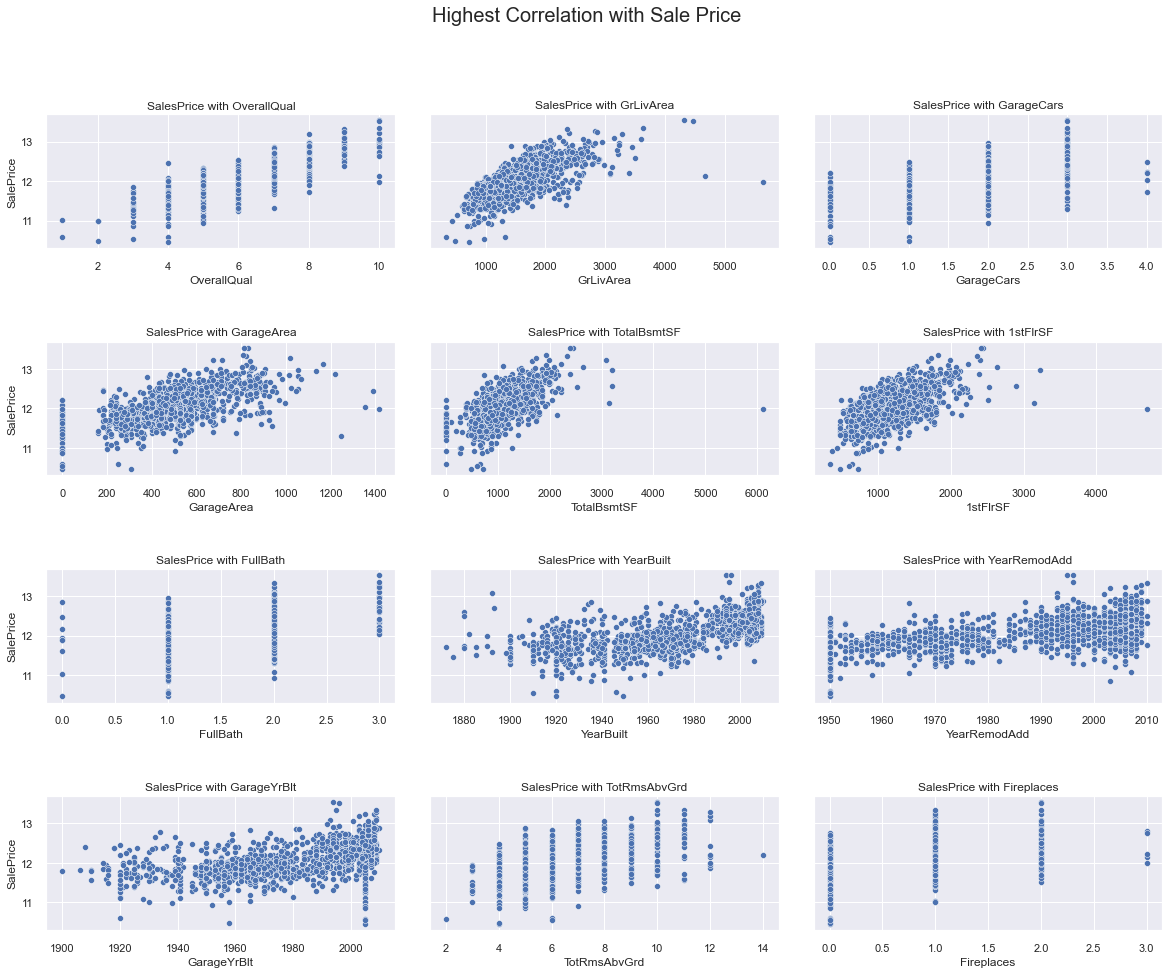

In [60]:
fig, axes = plt.subplots(4, 3, figsize=(20,15), sharey= True)  # sharey = True 모든 서브플롯이 동일한 y축을 가짐

# 또는 위의 subplots()에서 constrained_layout = True 를 활성화 하여 axes간 간격을 최적화할 수 있다. 
# 여기서는 그냥 아래와 같이 plt.subplots_adjust를 이용해서 더 넓직하게 설정함.

fig.suptitle("Highest Correlation with Sale Price", fontsize= 20) # suptitle: 모든 서브플롯을 대표하는 하나의 메인 타이틀
plt.subplots_adjust(hspace = 0.7, wspace=0.1)

for i,col in zip(range(12), sorted_corr):
    sns.scatterplot(y = data['SalePrice'], x = data[col], ax = axes[i//3][i%3])
    axes[i//3][i%3].set_title('SalesPrice with '+col)

* **OverallQaul과 기타 Area, SquareFootage관련 feature들의 양의 상관관계가 두드러짐**
* **몇몇 feature에서 outlier가 있음을 알 수 있음**

## Outliers 처리

In [100]:
#### 특별히 진행하지 않기로 함 ####

## 추가 전처리 

### 특정 컬럼 정정

In [63]:
data['MSSubClass'] = data['MSSubClass'].astype('str')

data['MSSubClass'].dtypes

dtype('O')

In [64]:
# 눈에 보인 게 있어서 그냥 바로 수정함.
data.loc[data['GarageYrBlt'] == 2207, 'GarageYrBlt'] = 2007

### one hot encoding

In [65]:
data.shape

(2919, 80)

In [66]:
# one_hot encoding을 통해 categorical 더미변수 생성

data = pd.get_dummies(data)

print(data.shape)

(2919, 318)


In [67]:
list(data.columns)

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_NA',
 'Alley_Pave',
 'LotShape_I

### 파생변수 생성 - 소개
#### 관련있는 변수를 합치기

* **집의 총 면적 = 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'**
* **사용구역의 총 면적 = 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea', 'GarageArea**

In [68]:
data['TotalHouse'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['TotalArea'] = data['TotalHouse'] + data['GarageArea']

In [69]:
data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF','TotalHouse']]

TotalBsmtSF  1stFlrSF  2ndFlrSF  TotalHouse
x 0           856.0       856       854      2566.0
  1          1262.0      1262         0      2524.0
  2           920.0       920       866      2706.0
  3           756.0       961       756      2473.0
  4          1145.0      1145      1053      3343.0
...             ...       ...       ...         ...
y 1454        546.0       546       546      1638.0
  1455        546.0       546       546      1638.0
  1456       1224.0      1224         0      2448.0
  1457        912.0       970         0      1882.0
  1458        996.0       996      1004      2996.0

[2919 rows x 4 columns]

In [70]:
data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea', 'GarageArea', 'TotalArea']]

TotalBsmtSF  1stFlrSF  2ndFlrSF  LotArea  GarageArea  TotalArea
x 0           856.0       856       854     8450       548.0     3114.0
  1          1262.0      1262         0     9600       460.0     2984.0
  2           920.0       920       866    11250       608.0     3314.0
  3           756.0       961       756     9550       642.0     3115.0
  4          1145.0      1145      1053    14260       836.0     4179.0
...             ...       ...       ...      ...         ...        ...
y 1454        546.0       546       546     1936         0.0     1638.0
  1455        546.0       546       546     1894       286.0     1924.0
  1456       1224.0      1224         0    20000       576.0     3024.0
  1457        912.0       970         0    10441         0.0     1882.0
  1458        996.0       996      1004     9627       650.0     3646.0

[2919 rows x 6 columns]

#### 종속변수와 상관관계 높은 변수들을 곱하여 가중치 높이기 

In [71]:
data['GrLivArea_OverallQual'] = data['OverallQual'] * data['GrLivArea']

data[['GrLivArea_OverallQual', 'OverallQual', 'GrLivArea']]

GrLivArea_OverallQual  OverallQual  GrLivArea
x 0                     11970            7       1710
  1                      7572            6       1262
  2                     12502            7       1786
  3                     12019            7       1717
  4                     17584            8       2198
...                       ...          ...        ...
y 1454                   4368            4       1092
  1455                   4368            4       1092
  1456                   6120            5       1224
  1457                   4850            5        970
  1458                  14000            7       2000

[2919 rows x 3 columns]

#### 대상 소유 유무에 따른 차이가 큰 변수들에 대해 소유 유무를 의미하는 컬럼 생성
* pool
* basement
* garage
* fireplace

In [72]:
data.loc[data['PoolQC_NA'] == 1, 'HasPool'] = 1
data.loc[data['PoolQC_NA'] != 1, 'HasPool'] = 0

In [73]:
data.loc[data['BsmtQual_NA'] == 1, 'HasBsmt'] = 1
data.loc[data['BsmtQual_NA'] != 1, 'HasBsmt'] = 0

In [74]:
data.loc[data['GarageType_NA'] == 1, 'HasGarage'] = 1
data.loc[data['GarageType_NA'] != 1, 'HasGarage'] = 0

In [75]:
data.loc[data['FireplaceQu_NA'] == 1, 'HasFireplace'] = 1
data.loc[data['FireplaceQu_NA'] != 1, 'HasFireplace'] = 0

In [76]:
data.shape

(2919, 325)

### train, test 재 분리

In [77]:
# train, test 재 분리

train = data.loc['x']
test = data.loc['y']
test.drop(['SalePrice'], axis = 1, inplace = True)

y = train['SalePrice']
train_x = train.drop(['SalePrice'], axis = 1)
test_x = test

display(train_x.shape, test_x.shape, y.shape)

(1460, 324)

(1459, 324)

(1460,)

## 모델 적용 및 제출

In [78]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, train_x, y,
                                    scoring = 'neg_mean_squared_error', cv = 5))
    return(rmse)

In [79]:
lasso = LassoCV(alphas = [1, 0.1, 0.01, 0.001, 0.0001], random_state = 1618).fit(train_x, y)
rmse_cv(lasso).mean()

0.14125667967846742

In [80]:
ridge = RidgeCV().fit(train_x, y)
rmse_cv(ridge).mean()

0.13477738345568926

In [81]:
model_xgb = XGBRegressor(n_estimators = 360, max_depth = 2, learning_rate = 0.1, random_state = 1618)
model_xgb.fit(train_x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=360, n_jobs=0, num_parallel_tree=1, random_state=1618,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
rmse_cv(model_xgb).mean()

0.12341258789548873

In [83]:
model_cat = CatBoostRegressor(random_state = 1618)
model_cat.fit(train_x, y)

Learning rate set to 0.04175
0:	learn: 0.3890335	total: 141ms	remaining: 2m 20s
1:	learn: 0.3781837	total: 144ms	remaining: 1m 11s
2:	learn: 0.3676419	total: 147ms	remaining: 48.9s
3:	learn: 0.3576302	total: 150ms	remaining: 37.5s
4:	learn: 0.3484555	total: 154ms	remaining: 30.6s
5:	learn: 0.3391099	total: 157ms	remaining: 26s
6:	learn: 0.3302799	total: 160ms	remaining: 22.7s
7:	learn: 0.3218201	total: 163ms	remaining: 20.2s
8:	learn: 0.3134920	total: 167ms	remaining: 18.4s
9:	learn: 0.3061532	total: 170ms	remaining: 16.8s
10:	learn: 0.2987421	total: 173ms	remaining: 15.6s
11:	learn: 0.2913958	total: 177ms	remaining: 14.6s
12:	learn: 0.2847549	total: 182ms	remaining: 13.8s
13:	learn: 0.2778844	total: 185ms	remaining: 13s
14:	learn: 0.2718156	total: 189ms	remaining: 12.4s
15:	learn: 0.2659412	total: 193ms	remaining: 11.9s
16:	learn: 0.2600762	total: 198ms	remaining: 11.4s
17:	learn: 0.2544915	total: 201ms	remaining: 11s
18:	learn: 0.2492356	total: 204ms	remaining: 10.5s
19:	learn: 0.244

176:	learn: 0.0973945	total: 713ms	remaining: 3.32s
177:	learn: 0.0972943	total: 717ms	remaining: 3.31s
178:	learn: 0.0972243	total: 721ms	remaining: 3.31s
179:	learn: 0.0970305	total: 725ms	remaining: 3.3s
180:	learn: 0.0968765	total: 728ms	remaining: 3.29s
181:	learn: 0.0966609	total: 732ms	remaining: 3.29s
182:	learn: 0.0964756	total: 735ms	remaining: 3.28s
183:	learn: 0.0963702	total: 738ms	remaining: 3.27s
184:	learn: 0.0961916	total: 741ms	remaining: 3.26s
185:	learn: 0.0959706	total: 744ms	remaining: 3.26s
186:	learn: 0.0957474	total: 747ms	remaining: 3.25s
187:	learn: 0.0955182	total: 750ms	remaining: 3.24s
188:	learn: 0.0953699	total: 754ms	remaining: 3.23s
189:	learn: 0.0952139	total: 757ms	remaining: 3.23s
190:	learn: 0.0950236	total: 760ms	remaining: 3.22s
191:	learn: 0.0949019	total: 763ms	remaining: 3.21s
192:	learn: 0.0947012	total: 766ms	remaining: 3.2s
193:	learn: 0.0945170	total: 769ms	remaining: 3.2s
194:	learn: 0.0942231	total: 773ms	remaining: 3.19s
195:	learn: 0.0

386:	learn: 0.0725091	total: 1.42s	remaining: 2.26s
387:	learn: 0.0724005	total: 1.43s	remaining: 2.25s
388:	learn: 0.0723253	total: 1.43s	remaining: 2.25s
389:	learn: 0.0723117	total: 1.44s	remaining: 2.25s
390:	learn: 0.0722978	total: 1.44s	remaining: 2.24s
391:	learn: 0.0722252	total: 1.44s	remaining: 2.24s
392:	learn: 0.0721409	total: 1.45s	remaining: 2.23s
393:	learn: 0.0720924	total: 1.45s	remaining: 2.23s
394:	learn: 0.0719676	total: 1.46s	remaining: 2.23s
395:	learn: 0.0719165	total: 1.46s	remaining: 2.23s
396:	learn: 0.0718376	total: 1.47s	remaining: 2.23s
397:	learn: 0.0717703	total: 1.47s	remaining: 2.22s
398:	learn: 0.0716401	total: 1.47s	remaining: 2.22s
399:	learn: 0.0715611	total: 1.48s	remaining: 2.21s
400:	learn: 0.0714345	total: 1.48s	remaining: 2.21s
401:	learn: 0.0712849	total: 1.48s	remaining: 2.21s
402:	learn: 0.0712342	total: 1.49s	remaining: 2.2s
403:	learn: 0.0711523	total: 1.49s	remaining: 2.2s
404:	learn: 0.0710549	total: 1.5s	remaining: 2.2s
405:	learn: 0.07

545:	learn: 0.0609973	total: 1.96s	remaining: 1.63s
546:	learn: 0.0609274	total: 1.96s	remaining: 1.63s
547:	learn: 0.0608726	total: 1.97s	remaining: 1.62s
548:	learn: 0.0608646	total: 1.97s	remaining: 1.62s
549:	learn: 0.0608338	total: 1.97s	remaining: 1.61s
550:	learn: 0.0607724	total: 1.98s	remaining: 1.61s
551:	learn: 0.0607161	total: 1.98s	remaining: 1.61s
552:	learn: 0.0606545	total: 1.98s	remaining: 1.6s
553:	learn: 0.0604990	total: 1.99s	remaining: 1.6s
554:	learn: 0.0604649	total: 1.99s	remaining: 1.59s
555:	learn: 0.0604035	total: 1.99s	remaining: 1.59s
556:	learn: 0.0603788	total: 2s	remaining: 1.59s
557:	learn: 0.0603548	total: 2s	remaining: 1.58s
558:	learn: 0.0602939	total: 2s	remaining: 1.58s
559:	learn: 0.0602036	total: 2s	remaining: 1.57s
560:	learn: 0.0601741	total: 2.01s	remaining: 1.57s
561:	learn: 0.0600651	total: 2.01s	remaining: 1.57s
562:	learn: 0.0599866	total: 2.01s	remaining: 1.56s
563:	learn: 0.0599814	total: 2.02s	remaining: 1.56s
564:	learn: 0.0599392	tota

707:	learn: 0.0516794	total: 2.49s	remaining: 1.03s
708:	learn: 0.0516168	total: 2.5s	remaining: 1.02s
709:	learn: 0.0515598	total: 2.5s	remaining: 1.02s
710:	learn: 0.0514659	total: 2.5s	remaining: 1.02s
711:	learn: 0.0514144	total: 2.51s	remaining: 1.01s
712:	learn: 0.0513374	total: 2.51s	remaining: 1.01s
713:	learn: 0.0513011	total: 2.52s	remaining: 1.01s
714:	learn: 0.0512662	total: 2.52s	remaining: 1s
715:	learn: 0.0512300	total: 2.52s	remaining: 1s
716:	learn: 0.0511301	total: 2.52s	remaining: 997ms
717:	learn: 0.0510767	total: 2.53s	remaining: 993ms
718:	learn: 0.0510400	total: 2.53s	remaining: 990ms
719:	learn: 0.0509460	total: 2.54s	remaining: 986ms
720:	learn: 0.0508798	total: 2.54s	remaining: 982ms
721:	learn: 0.0508256	total: 2.54s	remaining: 979ms
722:	learn: 0.0507394	total: 2.54s	remaining: 975ms
723:	learn: 0.0507124	total: 2.55s	remaining: 971ms
724:	learn: 0.0507032	total: 2.55s	remaining: 968ms
725:	learn: 0.0506734	total: 2.55s	remaining: 964ms
726:	learn: 0.0506521

868:	learn: 0.0444056	total: 3.03s	remaining: 457ms
869:	learn: 0.0443434	total: 3.03s	remaining: 453ms
870:	learn: 0.0442834	total: 3.04s	remaining: 450ms
871:	learn: 0.0442612	total: 3.04s	remaining: 446ms
872:	learn: 0.0442188	total: 3.04s	remaining: 443ms
873:	learn: 0.0441794	total: 3.05s	remaining: 439ms
874:	learn: 0.0440954	total: 3.05s	remaining: 436ms
875:	learn: 0.0440564	total: 3.05s	remaining: 432ms
876:	learn: 0.0440544	total: 3.06s	remaining: 429ms
877:	learn: 0.0440047	total: 3.06s	remaining: 425ms
878:	learn: 0.0439617	total: 3.06s	remaining: 422ms
879:	learn: 0.0439244	total: 3.07s	remaining: 418ms
880:	learn: 0.0439029	total: 3.07s	remaining: 415ms
881:	learn: 0.0438627	total: 3.07s	remaining: 411ms
882:	learn: 0.0438201	total: 3.08s	remaining: 408ms
883:	learn: 0.0437698	total: 3.08s	remaining: 404ms
884:	learn: 0.0437493	total: 3.08s	remaining: 401ms
885:	learn: 0.0436975	total: 3.08s	remaining: 397ms
886:	learn: 0.0436464	total: 3.09s	remaining: 394ms
887:	learn: 

In [84]:
rmse_cv(model_cat).mean()

Learning rate set to 0.040124
0:	learn: 0.3921889	total: 3.52ms	remaining: 3.52s
1:	learn: 0.3816659	total: 6.72ms	remaining: 3.35s
2:	learn: 0.3715659	total: 9.88ms	remaining: 3.28s
3:	learn: 0.3623948	total: 12.9ms	remaining: 3.2s
4:	learn: 0.3542718	total: 15.9ms	remaining: 3.16s
5:	learn: 0.3457789	total: 19.1ms	remaining: 3.17s
6:	learn: 0.3366080	total: 22.2ms	remaining: 3.14s
7:	learn: 0.3281573	total: 25.2ms	remaining: 3.12s
8:	learn: 0.3205144	total: 28.4ms	remaining: 3.12s
9:	learn: 0.3125370	total: 31.4ms	remaining: 3.11s
10:	learn: 0.3053898	total: 34.7ms	remaining: 3.12s
11:	learn: 0.2984485	total: 37.6ms	remaining: 3.1s
12:	learn: 0.2919838	total: 40.7ms	remaining: 3.09s
13:	learn: 0.2852321	total: 43.8ms	remaining: 3.09s
14:	learn: 0.2787420	total: 46.8ms	remaining: 3.08s
15:	learn: 0.2727526	total: 49.8ms	remaining: 3.06s
16:	learn: 0.2670724	total: 52.8ms	remaining: 3.06s
17:	learn: 0.2613027	total: 55.8ms	remaining: 3.04s
18:	learn: 0.2560731	total: 58.9ms	remaining: 

172:	learn: 0.1000978	total: 530ms	remaining: 2.53s
173:	learn: 0.0999117	total: 534ms	remaining: 2.53s
174:	learn: 0.0997137	total: 537ms	remaining: 2.53s
175:	learn: 0.0995845	total: 541ms	remaining: 2.53s
176:	learn: 0.0993787	total: 545ms	remaining: 2.53s
177:	learn: 0.0991718	total: 548ms	remaining: 2.53s
178:	learn: 0.0990668	total: 551ms	remaining: 2.52s
179:	learn: 0.0989290	total: 554ms	remaining: 2.52s
180:	learn: 0.0987591	total: 557ms	remaining: 2.52s
181:	learn: 0.0986220	total: 560ms	remaining: 2.52s
182:	learn: 0.0985614	total: 563ms	remaining: 2.51s
183:	learn: 0.0983053	total: 566ms	remaining: 2.51s
184:	learn: 0.0980308	total: 569ms	remaining: 2.5s
185:	learn: 0.0977693	total: 572ms	remaining: 2.5s
186:	learn: 0.0975037	total: 575ms	remaining: 2.5s
187:	learn: 0.0972391	total: 578ms	remaining: 2.49s
188:	learn: 0.0970468	total: 581ms	remaining: 2.49s
189:	learn: 0.0968244	total: 583ms	remaining: 2.49s
190:	learn: 0.0965654	total: 586ms	remaining: 2.48s
191:	learn: 0.0

341:	learn: 0.0757344	total: 1.06s	remaining: 2.05s
342:	learn: 0.0756766	total: 1.07s	remaining: 2.05s
343:	learn: 0.0755254	total: 1.07s	remaining: 2.04s
344:	learn: 0.0753399	total: 1.08s	remaining: 2.04s
345:	learn: 0.0752201	total: 1.08s	remaining: 2.04s
346:	learn: 0.0750809	total: 1.08s	remaining: 2.04s
347:	learn: 0.0750028	total: 1.09s	remaining: 2.03s
348:	learn: 0.0749820	total: 1.09s	remaining: 2.03s
349:	learn: 0.0749531	total: 1.09s	remaining: 2.03s
350:	learn: 0.0747960	total: 1.09s	remaining: 2.02s
351:	learn: 0.0746265	total: 1.1s	remaining: 2.02s
352:	learn: 0.0745175	total: 1.1s	remaining: 2.02s
353:	learn: 0.0743882	total: 1.1s	remaining: 2.01s
354:	learn: 0.0743555	total: 1.11s	remaining: 2.01s
355:	learn: 0.0743019	total: 1.11s	remaining: 2.01s
356:	learn: 0.0741659	total: 1.11s	remaining: 2s
357:	learn: 0.0740572	total: 1.12s	remaining: 2s
358:	learn: 0.0739534	total: 1.12s	remaining: 2s
359:	learn: 0.0739296	total: 1.12s	remaining: 1.99s
360:	learn: 0.0738136	to

511:	learn: 0.0627775	total: 1.6s	remaining: 1.53s
512:	learn: 0.0627100	total: 1.61s	remaining: 1.52s
513:	learn: 0.0626667	total: 1.61s	remaining: 1.52s
514:	learn: 0.0625941	total: 1.61s	remaining: 1.52s
515:	learn: 0.0625046	total: 1.62s	remaining: 1.52s
516:	learn: 0.0624517	total: 1.62s	remaining: 1.51s
517:	learn: 0.0623632	total: 1.62s	remaining: 1.51s
518:	learn: 0.0622508	total: 1.63s	remaining: 1.51s
519:	learn: 0.0622434	total: 1.63s	remaining: 1.51s
520:	learn: 0.0621362	total: 1.64s	remaining: 1.5s
521:	learn: 0.0620358	total: 1.64s	remaining: 1.5s
522:	learn: 0.0618990	total: 1.64s	remaining: 1.5s
523:	learn: 0.0618104	total: 1.65s	remaining: 1.5s
524:	learn: 0.0617052	total: 1.65s	remaining: 1.49s
525:	learn: 0.0616379	total: 1.66s	remaining: 1.49s
526:	learn: 0.0615906	total: 1.66s	remaining: 1.49s
527:	learn: 0.0614671	total: 1.66s	remaining: 1.49s
528:	learn: 0.0613797	total: 1.67s	remaining: 1.48s
529:	learn: 0.0612786	total: 1.67s	remaining: 1.48s
530:	learn: 0.061

672:	learn: 0.0528192	total: 2.12s	remaining: 1.03s
673:	learn: 0.0527079	total: 2.13s	remaining: 1.03s
674:	learn: 0.0526658	total: 2.13s	remaining: 1.03s
675:	learn: 0.0526143	total: 2.13s	remaining: 1.02s
676:	learn: 0.0525710	total: 2.14s	remaining: 1.02s
677:	learn: 0.0525575	total: 2.14s	remaining: 1.02s
678:	learn: 0.0525078	total: 2.15s	remaining: 1.01s
679:	learn: 0.0524525	total: 2.15s	remaining: 1.01s
680:	learn: 0.0523869	total: 2.15s	remaining: 1.01s
681:	learn: 0.0522809	total: 2.15s	remaining: 1s
682:	learn: 0.0522328	total: 2.16s	remaining: 1s
683:	learn: 0.0521936	total: 2.16s	remaining: 998ms
684:	learn: 0.0521836	total: 2.16s	remaining: 995ms
685:	learn: 0.0521760	total: 2.17s	remaining: 992ms
686:	learn: 0.0521496	total: 2.17s	remaining: 988ms
687:	learn: 0.0521318	total: 2.17s	remaining: 985ms
688:	learn: 0.0520807	total: 2.17s	remaining: 982ms
689:	learn: 0.0520485	total: 2.18s	remaining: 979ms
690:	learn: 0.0519376	total: 2.18s	remaining: 976ms
691:	learn: 0.0519

843:	learn: 0.0441453	total: 2.66s	remaining: 492ms
844:	learn: 0.0440738	total: 2.67s	remaining: 489ms
845:	learn: 0.0440032	total: 2.67s	remaining: 486ms
846:	learn: 0.0439670	total: 2.67s	remaining: 483ms
847:	learn: 0.0439403	total: 2.67s	remaining: 480ms
848:	learn: 0.0439006	total: 2.68s	remaining: 476ms
849:	learn: 0.0438465	total: 2.68s	remaining: 473ms
850:	learn: 0.0438223	total: 2.69s	remaining: 470ms
851:	learn: 0.0438047	total: 2.69s	remaining: 467ms
852:	learn: 0.0437794	total: 2.69s	remaining: 464ms
853:	learn: 0.0437379	total: 2.69s	remaining: 461ms
854:	learn: 0.0437291	total: 2.7s	remaining: 457ms
855:	learn: 0.0436867	total: 2.7s	remaining: 454ms
856:	learn: 0.0436355	total: 2.7s	remaining: 451ms
857:	learn: 0.0435902	total: 2.71s	remaining: 448ms
858:	learn: 0.0435441	total: 2.71s	remaining: 445ms
859:	learn: 0.0434949	total: 2.71s	remaining: 441ms
860:	learn: 0.0434455	total: 2.71s	remaining: 438ms
861:	learn: 0.0434002	total: 2.72s	remaining: 435ms
862:	learn: 0.0

58:	learn: 0.1461632	total: 176ms	remaining: 2.81s
59:	learn: 0.1449142	total: 180ms	remaining: 2.81s
60:	learn: 0.1438102	total: 183ms	remaining: 2.82s
61:	learn: 0.1426047	total: 186ms	remaining: 2.82s
62:	learn: 0.1415201	total: 190ms	remaining: 2.83s
63:	learn: 0.1405525	total: 193ms	remaining: 2.82s
64:	learn: 0.1396137	total: 196ms	remaining: 2.82s
65:	learn: 0.1386077	total: 199ms	remaining: 2.81s
66:	learn: 0.1376782	total: 202ms	remaining: 2.81s
67:	learn: 0.1368231	total: 204ms	remaining: 2.8s
68:	learn: 0.1357840	total: 207ms	remaining: 2.8s
69:	learn: 0.1349098	total: 210ms	remaining: 2.79s
70:	learn: 0.1340673	total: 213ms	remaining: 2.79s
71:	learn: 0.1332989	total: 216ms	remaining: 2.78s
72:	learn: 0.1325405	total: 219ms	remaining: 2.78s
73:	learn: 0.1316955	total: 222ms	remaining: 2.77s
74:	learn: 0.1309792	total: 224ms	remaining: 2.77s
75:	learn: 0.1301435	total: 227ms	remaining: 2.76s
76:	learn: 0.1294216	total: 230ms	remaining: 2.76s
77:	learn: 0.1287544	total: 233ms

233:	learn: 0.0863782	total: 709ms	remaining: 2.32s
234:	learn: 0.0863244	total: 712ms	remaining: 2.32s
235:	learn: 0.0861149	total: 716ms	remaining: 2.32s
236:	learn: 0.0859720	total: 719ms	remaining: 2.31s
237:	learn: 0.0859107	total: 722ms	remaining: 2.31s
238:	learn: 0.0856271	total: 726ms	remaining: 2.31s
239:	learn: 0.0855991	total: 728ms	remaining: 2.31s
240:	learn: 0.0853837	total: 732ms	remaining: 2.3s
241:	learn: 0.0852105	total: 735ms	remaining: 2.3s
242:	learn: 0.0850312	total: 738ms	remaining: 2.3s
243:	learn: 0.0848925	total: 741ms	remaining: 2.29s
244:	learn: 0.0848349	total: 743ms	remaining: 2.29s
245:	learn: 0.0846696	total: 747ms	remaining: 2.29s
246:	learn: 0.0846091	total: 749ms	remaining: 2.28s
247:	learn: 0.0844959	total: 752ms	remaining: 2.28s
248:	learn: 0.0843433	total: 755ms	remaining: 2.28s
249:	learn: 0.0841648	total: 758ms	remaining: 2.27s
250:	learn: 0.0839800	total: 761ms	remaining: 2.27s
251:	learn: 0.0839314	total: 764ms	remaining: 2.27s
252:	learn: 0.0

413:	learn: 0.0677526	total: 1.25s	remaining: 1.76s
414:	learn: 0.0676603	total: 1.25s	remaining: 1.76s
415:	learn: 0.0676078	total: 1.25s	remaining: 1.76s
416:	learn: 0.0674995	total: 1.26s	remaining: 1.76s
417:	learn: 0.0673959	total: 1.26s	remaining: 1.76s
418:	learn: 0.0672972	total: 1.26s	remaining: 1.75s
419:	learn: 0.0672297	total: 1.27s	remaining: 1.75s
420:	learn: 0.0671578	total: 1.27s	remaining: 1.75s
421:	learn: 0.0670352	total: 1.27s	remaining: 1.74s
422:	learn: 0.0669516	total: 1.28s	remaining: 1.74s
423:	learn: 0.0668449	total: 1.28s	remaining: 1.74s
424:	learn: 0.0667612	total: 1.28s	remaining: 1.73s
425:	learn: 0.0667063	total: 1.28s	remaining: 1.73s
426:	learn: 0.0666963	total: 1.29s	remaining: 1.73s
427:	learn: 0.0666054	total: 1.29s	remaining: 1.73s
428:	learn: 0.0665635	total: 1.29s	remaining: 1.72s
429:	learn: 0.0665241	total: 1.3s	remaining: 1.72s
430:	learn: 0.0664470	total: 1.3s	remaining: 1.72s
431:	learn: 0.0664325	total: 1.3s	remaining: 1.71s
432:	learn: 0.0

584:	learn: 0.0562512	total: 1.78s	remaining: 1.27s
585:	learn: 0.0562427	total: 1.79s	remaining: 1.26s
586:	learn: 0.0561797	total: 1.79s	remaining: 1.26s
587:	learn: 0.0561136	total: 1.79s	remaining: 1.26s
588:	learn: 0.0560552	total: 1.8s	remaining: 1.25s
589:	learn: 0.0559631	total: 1.8s	remaining: 1.25s
590:	learn: 0.0559152	total: 1.8s	remaining: 1.25s
591:	learn: 0.0559090	total: 1.81s	remaining: 1.25s
592:	learn: 0.0558125	total: 1.81s	remaining: 1.24s
593:	learn: 0.0557538	total: 1.81s	remaining: 1.24s
594:	learn: 0.0556492	total: 1.81s	remaining: 1.24s
595:	learn: 0.0555218	total: 1.82s	remaining: 1.23s
596:	learn: 0.0554031	total: 1.82s	remaining: 1.23s
597:	learn: 0.0553390	total: 1.82s	remaining: 1.23s
598:	learn: 0.0553307	total: 1.83s	remaining: 1.22s
599:	learn: 0.0552723	total: 1.83s	remaining: 1.22s
600:	learn: 0.0552517	total: 1.83s	remaining: 1.22s
601:	learn: 0.0551437	total: 1.83s	remaining: 1.21s
602:	learn: 0.0551189	total: 1.84s	remaining: 1.21s
603:	learn: 0.0

764:	learn: 0.0459369	total: 2.32s	remaining: 713ms
765:	learn: 0.0459328	total: 2.33s	remaining: 710ms
766:	learn: 0.0459273	total: 2.33s	remaining: 707ms
767:	learn: 0.0458595	total: 2.33s	remaining: 704ms
768:	learn: 0.0457996	total: 2.33s	remaining: 701ms
769:	learn: 0.0457368	total: 2.34s	remaining: 698ms
770:	learn: 0.0456809	total: 2.34s	remaining: 695ms
771:	learn: 0.0456034	total: 2.34s	remaining: 692ms
772:	learn: 0.0455636	total: 2.35s	remaining: 689ms
773:	learn: 0.0454910	total: 2.35s	remaining: 686ms
774:	learn: 0.0454199	total: 2.35s	remaining: 683ms
775:	learn: 0.0453536	total: 2.35s	remaining: 680ms
776:	learn: 0.0453206	total: 2.36s	remaining: 677ms
777:	learn: 0.0452734	total: 2.36s	remaining: 674ms
778:	learn: 0.0452096	total: 2.36s	remaining: 671ms
779:	learn: 0.0451517	total: 2.37s	remaining: 668ms
780:	learn: 0.0451066	total: 2.37s	remaining: 665ms
781:	learn: 0.0450496	total: 2.37s	remaining: 662ms
782:	learn: 0.0449833	total: 2.38s	remaining: 659ms
783:	learn: 

939:	learn: 0.0380161	total: 2.85s	remaining: 182ms
940:	learn: 0.0380025	total: 2.85s	remaining: 179ms
941:	learn: 0.0379584	total: 2.86s	remaining: 176ms
942:	learn: 0.0379032	total: 2.86s	remaining: 173ms
943:	learn: 0.0378595	total: 2.86s	remaining: 170ms
944:	learn: 0.0378198	total: 2.87s	remaining: 167ms
945:	learn: 0.0377853	total: 2.87s	remaining: 164ms
946:	learn: 0.0377824	total: 2.87s	remaining: 161ms
947:	learn: 0.0377370	total: 2.87s	remaining: 158ms
948:	learn: 0.0376939	total: 2.88s	remaining: 155ms
949:	learn: 0.0376906	total: 2.88s	remaining: 152ms
950:	learn: 0.0376467	total: 2.88s	remaining: 149ms
951:	learn: 0.0375600	total: 2.89s	remaining: 146ms
952:	learn: 0.0375110	total: 2.89s	remaining: 143ms
953:	learn: 0.0374596	total: 2.89s	remaining: 139ms
954:	learn: 0.0373992	total: 2.9s	remaining: 136ms
955:	learn: 0.0373479	total: 2.9s	remaining: 133ms
956:	learn: 0.0372998	total: 2.9s	remaining: 130ms
957:	learn: 0.0372659	total: 2.9s	remaining: 127ms
958:	learn: 0.03

149:	learn: 0.1005928	total: 473ms	remaining: 2.68s
150:	learn: 0.1004406	total: 476ms	remaining: 2.68s
151:	learn: 0.1002195	total: 480ms	remaining: 2.67s
152:	learn: 0.1000862	total: 483ms	remaining: 2.67s
153:	learn: 0.0998441	total: 487ms	remaining: 2.67s
154:	learn: 0.0994919	total: 490ms	remaining: 2.67s
155:	learn: 0.0992828	total: 493ms	remaining: 2.67s
156:	learn: 0.0990012	total: 496ms	remaining: 2.66s
157:	learn: 0.0987947	total: 499ms	remaining: 2.66s
158:	learn: 0.0985531	total: 502ms	remaining: 2.65s
159:	learn: 0.0982732	total: 505ms	remaining: 2.65s
160:	learn: 0.0980212	total: 508ms	remaining: 2.65s
161:	learn: 0.0978662	total: 511ms	remaining: 2.65s
162:	learn: 0.0977345	total: 514ms	remaining: 2.64s
163:	learn: 0.0974492	total: 517ms	remaining: 2.64s
164:	learn: 0.0972621	total: 520ms	remaining: 2.63s
165:	learn: 0.0971467	total: 523ms	remaining: 2.63s
166:	learn: 0.0968854	total: 526ms	remaining: 2.63s
167:	learn: 0.0966647	total: 529ms	remaining: 2.62s
168:	learn: 

321:	learn: 0.0734947	total: 1.01s	remaining: 2.13s
322:	learn: 0.0732837	total: 1.01s	remaining: 2.12s
323:	learn: 0.0731839	total: 1.02s	remaining: 2.12s
324:	learn: 0.0730820	total: 1.02s	remaining: 2.12s
325:	learn: 0.0730317	total: 1.02s	remaining: 2.12s
326:	learn: 0.0728695	total: 1.03s	remaining: 2.12s
327:	learn: 0.0728004	total: 1.03s	remaining: 2.11s
328:	learn: 0.0727336	total: 1.03s	remaining: 2.11s
329:	learn: 0.0726070	total: 1.04s	remaining: 2.11s
330:	learn: 0.0725473	total: 1.04s	remaining: 2.1s
331:	learn: 0.0724839	total: 1.04s	remaining: 2.1s
332:	learn: 0.0723954	total: 1.05s	remaining: 2.1s
333:	learn: 0.0722999	total: 1.05s	remaining: 2.09s
334:	learn: 0.0721998	total: 1.05s	remaining: 2.09s
335:	learn: 0.0720795	total: 1.06s	remaining: 2.09s
336:	learn: 0.0719538	total: 1.06s	remaining: 2.08s
337:	learn: 0.0718770	total: 1.06s	remaining: 2.08s
338:	learn: 0.0717947	total: 1.07s	remaining: 2.08s
339:	learn: 0.0716678	total: 1.07s	remaining: 2.08s
340:	learn: 0.0

494:	learn: 0.0580415	total: 1.54s	remaining: 1.57s
495:	learn: 0.0579391	total: 1.55s	remaining: 1.57s
496:	learn: 0.0578920	total: 1.55s	remaining: 1.57s
497:	learn: 0.0578251	total: 1.55s	remaining: 1.57s
498:	learn: 0.0577234	total: 1.56s	remaining: 1.56s
499:	learn: 0.0576298	total: 1.56s	remaining: 1.56s
500:	learn: 0.0576163	total: 1.56s	remaining: 1.56s
501:	learn: 0.0575169	total: 1.57s	remaining: 1.55s
502:	learn: 0.0574357	total: 1.57s	remaining: 1.55s
503:	learn: 0.0574222	total: 1.57s	remaining: 1.55s
504:	learn: 0.0573486	total: 1.57s	remaining: 1.54s
505:	learn: 0.0572731	total: 1.58s	remaining: 1.54s
506:	learn: 0.0572084	total: 1.58s	remaining: 1.54s
507:	learn: 0.0571199	total: 1.58s	remaining: 1.53s
508:	learn: 0.0570142	total: 1.59s	remaining: 1.53s
509:	learn: 0.0569465	total: 1.59s	remaining: 1.53s
510:	learn: 0.0568757	total: 1.59s	remaining: 1.52s
511:	learn: 0.0567768	total: 1.6s	remaining: 1.52s
512:	learn: 0.0566900	total: 1.6s	remaining: 1.52s
513:	learn: 0.

667:	learn: 0.0484049	total: 2.07s	remaining: 1.03s
668:	learn: 0.0483852	total: 2.08s	remaining: 1.03s
669:	learn: 0.0483810	total: 2.08s	remaining: 1.02s
670:	learn: 0.0483302	total: 2.08s	remaining: 1.02s
671:	learn: 0.0483213	total: 2.09s	remaining: 1.02s
672:	learn: 0.0482339	total: 2.09s	remaining: 1.01s
673:	learn: 0.0482298	total: 2.09s	remaining: 1.01s
674:	learn: 0.0482196	total: 2.1s	remaining: 1.01s
675:	learn: 0.0482116	total: 2.1s	remaining: 1s
676:	learn: 0.0482031	total: 2.1s	remaining: 1s
677:	learn: 0.0481308	total: 2.1s	remaining: 1000ms
678:	learn: 0.0480562	total: 2.11s	remaining: 997ms
679:	learn: 0.0479999	total: 2.11s	remaining: 993ms
680:	learn: 0.0478950	total: 2.11s	remaining: 990ms
681:	learn: 0.0478223	total: 2.12s	remaining: 987ms
682:	learn: 0.0477265	total: 2.12s	remaining: 984ms
683:	learn: 0.0477124	total: 2.12s	remaining: 981ms
684:	learn: 0.0477072	total: 2.13s	remaining: 978ms
685:	learn: 0.0476670	total: 2.13s	remaining: 975ms
686:	learn: 0.0476238

843:	learn: 0.0398516	total: 2.61s	remaining: 482ms
844:	learn: 0.0398181	total: 2.61s	remaining: 479ms
845:	learn: 0.0397751	total: 2.62s	remaining: 476ms
846:	learn: 0.0397482	total: 2.62s	remaining: 473ms
847:	learn: 0.0396801	total: 2.62s	remaining: 470ms
848:	learn: 0.0396131	total: 2.63s	remaining: 467ms
849:	learn: 0.0395887	total: 2.63s	remaining: 464ms
850:	learn: 0.0395290	total: 2.63s	remaining: 461ms
851:	learn: 0.0395253	total: 2.63s	remaining: 458ms
852:	learn: 0.0394895	total: 2.64s	remaining: 455ms
853:	learn: 0.0394666	total: 2.64s	remaining: 451ms
854:	learn: 0.0394337	total: 2.64s	remaining: 448ms
855:	learn: 0.0393958	total: 2.65s	remaining: 445ms
856:	learn: 0.0393923	total: 2.65s	remaining: 442ms
857:	learn: 0.0393056	total: 2.65s	remaining: 439ms
858:	learn: 0.0392956	total: 2.66s	remaining: 436ms
859:	learn: 0.0392506	total: 2.66s	remaining: 433ms
860:	learn: 0.0392163	total: 2.66s	remaining: 430ms
861:	learn: 0.0391659	total: 2.66s	remaining: 427ms
862:	learn: 

0:	learn: 0.3923997	total: 3.83ms	remaining: 3.83s
1:	learn: 0.3826715	total: 7.55ms	remaining: 3.77s
2:	learn: 0.3727209	total: 11.9ms	remaining: 3.95s
3:	learn: 0.3634578	total: 15.3ms	remaining: 3.8s
4:	learn: 0.3548131	total: 18.5ms	remaining: 3.67s
5:	learn: 0.3461415	total: 21.9ms	remaining: 3.63s
6:	learn: 0.3375437	total: 25.4ms	remaining: 3.6s
7:	learn: 0.3292383	total: 28.6ms	remaining: 3.54s
8:	learn: 0.3215609	total: 31.7ms	remaining: 3.5s
9:	learn: 0.3135954	total: 35.1ms	remaining: 3.47s
10:	learn: 0.3060132	total: 38.1ms	remaining: 3.43s
11:	learn: 0.2997187	total: 41.4ms	remaining: 3.41s
12:	learn: 0.2931883	total: 44.7ms	remaining: 3.39s
13:	learn: 0.2869317	total: 47.8ms	remaining: 3.37s
14:	learn: 0.2804341	total: 50.8ms	remaining: 3.34s
15:	learn: 0.2743077	total: 54.1ms	remaining: 3.33s
16:	learn: 0.2681751	total: 57.1ms	remaining: 3.3s
17:	learn: 0.2629004	total: 59.2ms	remaining: 3.23s
18:	learn: 0.2578070	total: 62.3ms	remaining: 3.21s
19:	learn: 0.2524244	total

166:	learn: 0.1011199	total: 533ms	remaining: 2.66s
167:	learn: 0.1009829	total: 536ms	remaining: 2.66s
168:	learn: 0.1007106	total: 540ms	remaining: 2.65s
169:	learn: 0.1004517	total: 544ms	remaining: 2.66s
170:	learn: 0.1002425	total: 547ms	remaining: 2.65s
171:	learn: 0.1000983	total: 550ms	remaining: 2.65s
172:	learn: 0.0998814	total: 553ms	remaining: 2.65s
173:	learn: 0.0996434	total: 556ms	remaining: 2.64s
174:	learn: 0.0993597	total: 559ms	remaining: 2.64s
175:	learn: 0.0992786	total: 562ms	remaining: 2.63s
176:	learn: 0.0990345	total: 565ms	remaining: 2.63s
177:	learn: 0.0987924	total: 568ms	remaining: 2.63s
178:	learn: 0.0986044	total: 572ms	remaining: 2.62s
179:	learn: 0.0983153	total: 575ms	remaining: 2.62s
180:	learn: 0.0980885	total: 578ms	remaining: 2.61s
181:	learn: 0.0978831	total: 581ms	remaining: 2.61s
182:	learn: 0.0977041	total: 584ms	remaining: 2.61s
183:	learn: 0.0975195	total: 587ms	remaining: 2.6s
184:	learn: 0.0973607	total: 590ms	remaining: 2.6s
185:	learn: 0.

339:	learn: 0.0766576	total: 1.07s	remaining: 2.08s
340:	learn: 0.0766152	total: 1.07s	remaining: 2.07s
341:	learn: 0.0764819	total: 1.08s	remaining: 2.07s
342:	learn: 0.0763965	total: 1.08s	remaining: 2.07s
343:	learn: 0.0763193	total: 1.08s	remaining: 2.06s
344:	learn: 0.0761654	total: 1.09s	remaining: 2.06s
345:	learn: 0.0760101	total: 1.09s	remaining: 2.06s
346:	learn: 0.0759146	total: 1.09s	remaining: 2.06s
347:	learn: 0.0757881	total: 1.09s	remaining: 2.05s
348:	learn: 0.0756246	total: 1.1s	remaining: 2.05s
349:	learn: 0.0755215	total: 1.1s	remaining: 2.05s
350:	learn: 0.0753754	total: 1.1s	remaining: 2.04s
351:	learn: 0.0751889	total: 1.11s	remaining: 2.04s
352:	learn: 0.0750442	total: 1.11s	remaining: 2.04s
353:	learn: 0.0749311	total: 1.11s	remaining: 2.03s
354:	learn: 0.0748513	total: 1.12s	remaining: 2.03s
355:	learn: 0.0747101	total: 1.12s	remaining: 2.03s
356:	learn: 0.0746799	total: 1.12s	remaining: 2.02s
357:	learn: 0.0745772	total: 1.13s	remaining: 2.02s
358:	learn: 0.0

511:	learn: 0.0617851	total: 1.6s	remaining: 1.53s
512:	learn: 0.0616891	total: 1.61s	remaining: 1.52s
513:	learn: 0.0616084	total: 1.61s	remaining: 1.52s
514:	learn: 0.0615728	total: 1.61s	remaining: 1.52s
515:	learn: 0.0614522	total: 1.62s	remaining: 1.52s
516:	learn: 0.0613275	total: 1.62s	remaining: 1.51s
517:	learn: 0.0612640	total: 1.62s	remaining: 1.51s
518:	learn: 0.0612078	total: 1.63s	remaining: 1.51s
519:	learn: 0.0610707	total: 1.63s	remaining: 1.5s
520:	learn: 0.0609619	total: 1.63s	remaining: 1.5s
521:	learn: 0.0608900	total: 1.64s	remaining: 1.5s
522:	learn: 0.0607902	total: 1.64s	remaining: 1.5s
523:	learn: 0.0607087	total: 1.64s	remaining: 1.49s
524:	learn: 0.0606608	total: 1.65s	remaining: 1.49s
525:	learn: 0.0606512	total: 1.65s	remaining: 1.49s
526:	learn: 0.0605822	total: 1.65s	remaining: 1.48s
527:	learn: 0.0605186	total: 1.65s	remaining: 1.48s
528:	learn: 0.0604887	total: 1.66s	remaining: 1.48s
529:	learn: 0.0604029	total: 1.66s	remaining: 1.47s
530:	learn: 0.060

685:	learn: 0.0506698	total: 2.14s	remaining: 979ms
686:	learn: 0.0505900	total: 2.14s	remaining: 976ms
687:	learn: 0.0505112	total: 2.15s	remaining: 973ms
688:	learn: 0.0504447	total: 2.15s	remaining: 971ms
689:	learn: 0.0504380	total: 2.15s	remaining: 967ms
690:	learn: 0.0503839	total: 2.16s	remaining: 964ms
691:	learn: 0.0503462	total: 2.16s	remaining: 961ms
692:	learn: 0.0502900	total: 2.16s	remaining: 958ms
693:	learn: 0.0502059	total: 2.17s	remaining: 955ms
694:	learn: 0.0501409	total: 2.17s	remaining: 952ms
695:	learn: 0.0500799	total: 2.17s	remaining: 948ms
696:	learn: 0.0500484	total: 2.17s	remaining: 945ms
697:	learn: 0.0499565	total: 2.18s	remaining: 942ms
698:	learn: 0.0498300	total: 2.18s	remaining: 939ms
699:	learn: 0.0497519	total: 2.18s	remaining: 936ms
700:	learn: 0.0497108	total: 2.19s	remaining: 933ms
701:	learn: 0.0496575	total: 2.19s	remaining: 930ms
702:	learn: 0.0496081	total: 2.19s	remaining: 926ms
703:	learn: 0.0495016	total: 2.19s	remaining: 923ms
704:	learn: 

858:	learn: 0.0418882	total: 2.67s	remaining: 438ms
859:	learn: 0.0418698	total: 2.67s	remaining: 435ms
860:	learn: 0.0418252	total: 2.67s	remaining: 432ms
861:	learn: 0.0417774	total: 2.68s	remaining: 429ms
862:	learn: 0.0417704	total: 2.68s	remaining: 426ms
863:	learn: 0.0417366	total: 2.69s	remaining: 423ms
864:	learn: 0.0417042	total: 2.69s	remaining: 420ms
865:	learn: 0.0416265	total: 2.69s	remaining: 417ms
866:	learn: 0.0415978	total: 2.69s	remaining: 414ms
867:	learn: 0.0415394	total: 2.7s	remaining: 410ms
868:	learn: 0.0415031	total: 2.7s	remaining: 407ms
869:	learn: 0.0414722	total: 2.71s	remaining: 404ms
870:	learn: 0.0414410	total: 2.71s	remaining: 401ms
871:	learn: 0.0414073	total: 2.71s	remaining: 398ms
872:	learn: 0.0413644	total: 2.71s	remaining: 395ms
873:	learn: 0.0413258	total: 2.72s	remaining: 392ms
874:	learn: 0.0412884	total: 2.72s	remaining: 389ms
875:	learn: 0.0412583	total: 2.72s	remaining: 386ms
876:	learn: 0.0412281	total: 2.73s	remaining: 382ms
877:	learn: 0.

62:	learn: 0.1440067	total: 224ms	remaining: 3.33s
63:	learn: 0.1428842	total: 227ms	remaining: 3.32s
64:	learn: 0.1422707	total: 228ms	remaining: 3.29s
65:	learn: 0.1413503	total: 231ms	remaining: 3.27s
66:	learn: 0.1404048	total: 235ms	remaining: 3.27s
67:	learn: 0.1393914	total: 238ms	remaining: 3.26s
68:	learn: 0.1385169	total: 241ms	remaining: 3.25s
69:	learn: 0.1377032	total: 243ms	remaining: 3.23s
70:	learn: 0.1368297	total: 246ms	remaining: 3.22s
71:	learn: 0.1359019	total: 250ms	remaining: 3.22s
72:	learn: 0.1348387	total: 253ms	remaining: 3.21s
73:	learn: 0.1340156	total: 257ms	remaining: 3.21s
74:	learn: 0.1331854	total: 262ms	remaining: 3.23s
75:	learn: 0.1324098	total: 270ms	remaining: 3.28s
76:	learn: 0.1314374	total: 285ms	remaining: 3.42s
77:	learn: 0.1308056	total: 320ms	remaining: 3.78s
78:	learn: 0.1298971	total: 345ms	remaining: 4.02s
79:	learn: 0.1292428	total: 363ms	remaining: 4.17s
80:	learn: 0.1284366	total: 383ms	remaining: 4.34s
81:	learn: 0.1277647	total: 423

230:	learn: 0.0873223	total: 916ms	remaining: 3.05s
231:	learn: 0.0871220	total: 920ms	remaining: 3.04s
232:	learn: 0.0870811	total: 923ms	remaining: 3.04s
233:	learn: 0.0869946	total: 926ms	remaining: 3.03s
234:	learn: 0.0868475	total: 928ms	remaining: 3.02s
235:	learn: 0.0867074	total: 932ms	remaining: 3.02s
236:	learn: 0.0865558	total: 935ms	remaining: 3.01s
237:	learn: 0.0864219	total: 938ms	remaining: 3s
238:	learn: 0.0862847	total: 941ms	remaining: 3s
239:	learn: 0.0862484	total: 944ms	remaining: 2.99s
240:	learn: 0.0859546	total: 947ms	remaining: 2.98s
241:	learn: 0.0858586	total: 950ms	remaining: 2.98s
242:	learn: 0.0857319	total: 953ms	remaining: 2.97s
243:	learn: 0.0856110	total: 956ms	remaining: 2.96s
244:	learn: 0.0855355	total: 959ms	remaining: 2.96s
245:	learn: 0.0854731	total: 962ms	remaining: 2.95s
246:	learn: 0.0854253	total: 965ms	remaining: 2.94s
247:	learn: 0.0853882	total: 968ms	remaining: 2.94s
248:	learn: 0.0853400	total: 971ms	remaining: 2.93s
249:	learn: 0.0851

390:	learn: 0.0710106	total: 1.44s	remaining: 2.25s
391:	learn: 0.0709215	total: 1.44s	remaining: 2.24s
392:	learn: 0.0708427	total: 1.45s	remaining: 2.24s
393:	learn: 0.0707323	total: 1.45s	remaining: 2.23s
394:	learn: 0.0707190	total: 1.45s	remaining: 2.23s
395:	learn: 0.0705990	total: 1.46s	remaining: 2.22s
396:	learn: 0.0704692	total: 1.46s	remaining: 2.22s
397:	learn: 0.0702903	total: 1.46s	remaining: 2.21s
398:	learn: 0.0702792	total: 1.47s	remaining: 2.21s
399:	learn: 0.0701402	total: 1.47s	remaining: 2.21s
400:	learn: 0.0699976	total: 1.47s	remaining: 2.2s
401:	learn: 0.0698586	total: 1.48s	remaining: 2.19s
402:	learn: 0.0697271	total: 1.48s	remaining: 2.19s
403:	learn: 0.0695899	total: 1.48s	remaining: 2.19s
404:	learn: 0.0694694	total: 1.49s	remaining: 2.18s
405:	learn: 0.0693828	total: 1.49s	remaining: 2.18s
406:	learn: 0.0692669	total: 1.49s	remaining: 2.17s
407:	learn: 0.0691120	total: 1.5s	remaining: 2.17s
408:	learn: 0.0689973	total: 1.5s	remaining: 2.17s
409:	learn: 0.0

550:	learn: 0.0580918	total: 1.96s	remaining: 1.6s
551:	learn: 0.0580847	total: 1.97s	remaining: 1.6s
552:	learn: 0.0580263	total: 1.97s	remaining: 1.59s
553:	learn: 0.0579526	total: 1.97s	remaining: 1.59s
554:	learn: 0.0578612	total: 1.98s	remaining: 1.58s
555:	learn: 0.0578545	total: 1.98s	remaining: 1.58s
556:	learn: 0.0577394	total: 1.98s	remaining: 1.58s
557:	learn: 0.0576590	total: 1.99s	remaining: 1.57s
558:	learn: 0.0575432	total: 1.99s	remaining: 1.57s
559:	learn: 0.0574997	total: 1.99s	remaining: 1.57s
560:	learn: 0.0574925	total: 2s	remaining: 1.56s
561:	learn: 0.0573909	total: 2s	remaining: 1.56s
562:	learn: 0.0573596	total: 2s	remaining: 1.55s
563:	learn: 0.0572863	total: 2.01s	remaining: 1.55s
564:	learn: 0.0571941	total: 2.01s	remaining: 1.55s
565:	learn: 0.0571232	total: 2.01s	remaining: 1.54s
566:	learn: 0.0570677	total: 2.02s	remaining: 1.54s
567:	learn: 0.0570271	total: 2.02s	remaining: 1.54s
568:	learn: 0.0569754	total: 2.02s	remaining: 1.53s
569:	learn: 0.0569263	t

709:	learn: 0.0486660	total: 2.5s	remaining: 1.02s
710:	learn: 0.0486032	total: 2.5s	remaining: 1.01s
711:	learn: 0.0485026	total: 2.5s	remaining: 1.01s
712:	learn: 0.0484197	total: 2.5s	remaining: 1.01s
713:	learn: 0.0483113	total: 2.51s	remaining: 1s
714:	learn: 0.0482120	total: 2.51s	remaining: 1s
715:	learn: 0.0481636	total: 2.51s	remaining: 997ms
716:	learn: 0.0481037	total: 2.52s	remaining: 994ms
717:	learn: 0.0480976	total: 2.52s	remaining: 990ms
718:	learn: 0.0480631	total: 2.52s	remaining: 987ms
719:	learn: 0.0480301	total: 2.53s	remaining: 983ms
720:	learn: 0.0479643	total: 2.53s	remaining: 979ms
721:	learn: 0.0478772	total: 2.53s	remaining: 976ms
722:	learn: 0.0478097	total: 2.54s	remaining: 972ms
723:	learn: 0.0477557	total: 2.54s	remaining: 969ms
724:	learn: 0.0477514	total: 2.54s	remaining: 965ms
725:	learn: 0.0477077	total: 2.55s	remaining: 961ms
726:	learn: 0.0476454	total: 2.55s	remaining: 958ms
727:	learn: 0.0475959	total: 2.55s	remaining: 954ms
728:	learn: 0.0475124	

878:	learn: 0.0411986	total: 3.03s	remaining: 417ms
879:	learn: 0.0411500	total: 3.03s	remaining: 414ms
880:	learn: 0.0411465	total: 3.04s	remaining: 410ms
881:	learn: 0.0411029	total: 3.04s	remaining: 407ms
882:	learn: 0.0410693	total: 3.04s	remaining: 403ms
883:	learn: 0.0410191	total: 3.04s	remaining: 400ms
884:	learn: 0.0409850	total: 3.05s	remaining: 396ms
885:	learn: 0.0409486	total: 3.05s	remaining: 393ms
886:	learn: 0.0408821	total: 3.05s	remaining: 389ms
887:	learn: 0.0408415	total: 3.06s	remaining: 386ms
888:	learn: 0.0407834	total: 3.06s	remaining: 382ms
889:	learn: 0.0407486	total: 3.06s	remaining: 379ms
890:	learn: 0.0407359	total: 3.07s	remaining: 375ms
891:	learn: 0.0407083	total: 3.07s	remaining: 372ms
892:	learn: 0.0406783	total: 3.07s	remaining: 368ms
893:	learn: 0.0406294	total: 3.08s	remaining: 365ms
894:	learn: 0.0406255	total: 3.08s	remaining: 361ms
895:	learn: 0.0405932	total: 3.08s	remaining: 358ms
896:	learn: 0.0405648	total: 3.08s	remaining: 354ms
897:	learn: 

0.11713362359242545

In [85]:
lasso_preds = np.expm1(lasso.predict(test_x))
ridge_preds = np.expm1(ridge.predict(test_x))
xgb_preds = np.expm1(model_xgb.predict(test_x))
cat_preds = np.expm1(model_cat.predict(test_x))

In [89]:
preds = 0.5*ridge_preds + 0.5*cat_preds

In [90]:
submission = pd.read_csv('sample_submission.csv', index_col = 'Id')

submission['SalePrice'] = preds

submission.head()

,SalePrice
Id,
1461,121402.320786
1462,154173.842366
1463,180443.666043
1464,195817.862464
1465,191162.575569


In [91]:
submission.to_csv('submission_16.csv')

* **제출 후 RMSE: 0.11972(submission_16, 상위 약 4.3% 달성)**

## 모델별 feature importance 

### Lasso모델

In [92]:
feature_importance = pd.Series(index = test_x.columns, data = np.abs(lasso.coef_))

top10_features_lasso = pd.DataFrame(feature_importance.sort_values(ascending = False),
                                   columns = ['coef']).head(10)

top10_features_lasso

,coef
MSZoning_C (all),0.181254
OverallQual,0.120911
Neighborhood_Crawfor,0.094198
Neighborhood_StoneBr,0.081166
Neighborhood_NridgHt,0.069010
Neighborhood_NoRidge,0.068152
KitchenQual_Ex,0.064351
SaleCondition_Abnorml,0.058233
Functional_Typ,0.054431
Exterior1st_BrkFace,0.054220


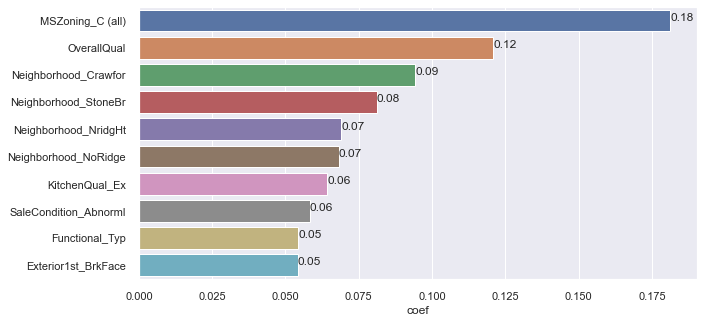

In [93]:
plt.figure(figsize = (10, 5))
sns.barplot(data = top10_features_lasso, y = top10_features_lasso.index, x = 'coef')
coef = top10_features_lasso['coef']

for i in range(coef.shape[0]):
    plt.text(x = coef[i], y = i, s = round(coef[i],2))

plt.show()

### Ridge 모델

In [94]:
feature_importance = pd.Series(index = test_x.columns, data = np.abs(ridge.coef_))

top10_features_ridge = pd.DataFrame(feature_importance.sort_values(ascending = False),
                                   columns = ['coef']).head(10)

top10_features_ridge

,coef
MSZoning_C (all),0.139036
OverallQual,0.107784
RoofMatl_ClyTile,0.104797
Neighborhood_StoneBr,0.094629
Neighborhood_Crawfor,0.083132
Neighborhood_NoRidge,0.081073
Neighborhood_NridgHt,0.075481
RoofMatl_WdShngl,0.073239
Condition2_PosN,0.073051
Neighborhood_Edwards,0.067505


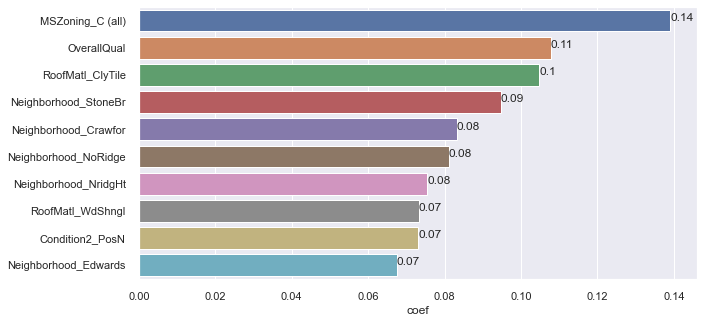

In [95]:
plt.figure(figsize = (10, 5))
sns.barplot(data = top10_features_ridge, y = top10_features_ridge.index, x = 'coef')
coef = top10_features_ridge['coef']

for i in range(coef.shape[0]):
    plt.text(x = coef[i], y = i, s = round(coef[i],2))

plt.show()

### XGB 모델 

In [96]:
feature_importance = pd.Series(data = model_xgb.feature_importances_, index = test_x.columns)

top10_features_xgb = pd.DataFrame(feature_importance.sort_values(ascending = False),
                                   columns = ['coef']).head(10)

top10_features_xgb

,coef
Fireplaces,0.083780
BsmtQual_Ex,0.080269
OverallQual,0.079505
TotalArea,0.077649
BsmtFinType1_GLQ,0.075652
MSZoning_RL,0.054633
YearRemodAdd,0.043272
PavedDrive_Y,0.038167
GrLivArea_OverallQual,0.034254
KitchenQual_Ex,0.030398


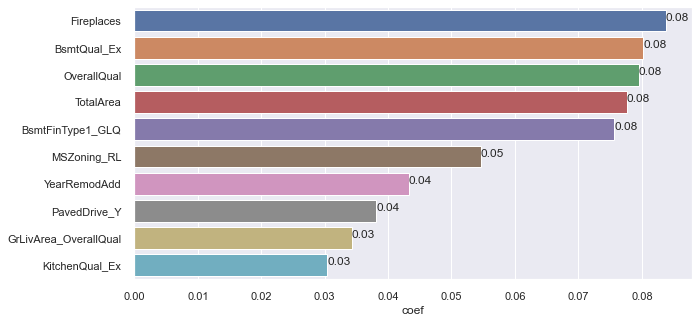

In [97]:
plt.figure(figsize = (10, 5))
sns.barplot(data = top10_features_xgb, y = top10_features_xgb.index, x = 'coef')
coef = top10_features_xgb['coef']

for i in range(coef.shape[0]):
    plt.text(x = coef[i], y = i, s = round(coef[i],2))

plt.show()

### CatBoost모델

In [98]:
feature_importance = pd.Series(data = model_cat.feature_importances_, index = test_x.columns)

top10_features_cat = pd.DataFrame(feature_importance.sort_values(ascending = False).head(10), columns = ['coef'])

top10_features_cat

,coef
GrLivArea_OverallQual,15.721110
TotalArea,11.777065
OverallQual,11.244549
TotalHouse,8.469340
YearBuilt,3.584644
OverallCond,3.071329
YearRemodAdd,2.883845
LotArea,2.742299
BsmtFinSF1,2.578577
GarageArea,2.110617


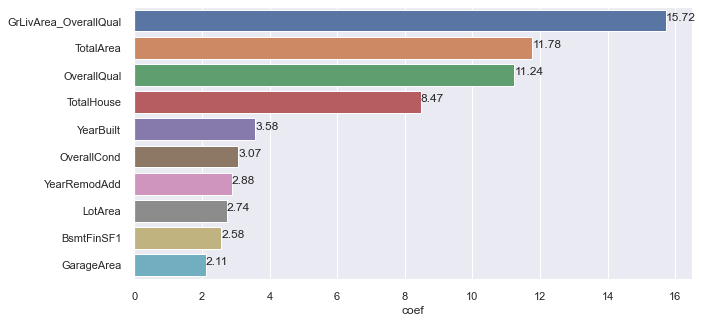

In [99]:
plt.figure(figsize = (10, 5))
sns.barplot(data = top10_features_cat, y = top10_features_cat.index, x = 'coef')
coef = top10_features_cat['coef']

for i in range(coef.shape[0]):
    plt.text(x = coef[i], y = i, s = round(coef[i],2))

plt.show()

## 결론
* **공통적인 중요변수: OverallQual**


* **ridge, lasso는 Zoning과 근거리 지역에 대해 높은 가중치를 준 반면에, 부스팅 모델들은 집의 규모, 연식과 관련된 컬럼에 높은 가중치를 주었다.**
    * 회귀 분석에서 정규화 모델과 부스팅 모델을 혼합하는 것이 긍정적인 효과를 볼 수 있다.
    * 정규화모델(모든 변수의 영향력을 정규화) + 부스팅모델(중요도가 높은 변수에 높은 가중치)
    
    
* **파생변수 생성 중 1, 2에 대한 효과가 높았음을 알 수 있다.**
    * 관련된 변수를 합친다거나, 상관관계가 높은 컬럼들끼리 더하거나 곱하여 가중치를 높이게 되면 예측에 긍정적인 영향을 줄 수 있다.
    
    
* **train, test데이터의 분포를 비교하는 것이 필요하다.**
    * train과 test의 분포 형태가 많이 다르다면 train에 과적합될 가능성이 높다.
    
    
* **아웃라이어 처리, 명목형변수 중 불균형한 컬럼 처리를 하지 않은 것이 더 좋은 점수가 나올 수 있다.**
    * train data는 약 1400개로 많지 않은 편이다. 따라서 이 경우는 feature가 적당히 많은 것이 학습에 오히려 도움이 될 수 있다.